Objective
====

This project's intent is to be able to make a classification judgement on a mushroom, either poisonous or edible, based on the given dataset.

In [ ]:
# The dataset comes from Kaggle.com

**1. IMPORT NECESSARY LIBRARIES**

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import matplotlib.pyplot as plt

**2. LOAD DATA**

In [2]:
df1 = pd.read_csv("mushrooms.csv")
df = df1.copy()
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


**3. UNDERSTANDING THE DATA-SET**

Data Summary
--

This dataset includes the descriptions of various hypothetical samples encompassing 23 different gilled mushrooms in the Agaricus and Lepiota Family Mushroom. These samples are drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each of the various species are identifiable as definitely edible, definitely poisonous, or of unknown edibility and are definitely not recommended to be eaten. This latter class is combined with the poisonous one category and identified as such. The Audubon Society Field Guide clearly states in the literature that there is not any simple route or rule for deciding edibility of a mushroom. This is very different from Poisonous Oak and Ivy that have a rule "leaflets three, let it be''; therefore the outdoor activity of ‘Shrooming’ can be a bit more challenging!

**The variables of the dataset are the following:**

**Dependent Variable**

classes: 
<ul>
<li>edible=e, 
<li>poisonous=p
</ul>

**Independent Variable**

<ul>
<li>cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
<li>cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
<li>cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
<li>bruises: bruises=t,no=f
<li>odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
<li>gill-attachment: attached=a,descending=d,free=f,notched=n
<li>gill-spacing: close=c,crowded=w,distant=d
<li>gill-size: broad=b,narrow=n
<li>gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
<li>stalk-shape: enlarging=e,tapering=t
<li>stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
<li>stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
<li>stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
<li>stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
<li>stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
<li>veil-type: partial=p,universal=u
<li>veil-color: brown=n,orange=o,white=w,yellow=y
<li>ring-number: none=n,one=o,two=t
<li>ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
<li>spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
<li>population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
<li>habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d
</ul>

**Exploring the data**

In [3]:
df.shape

(8124, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


*#Checking for missing values*

In [7]:
df.isnull().values.any()

False

In [8]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

**3. EXPLORATORY DATA ANALYSIS ON CATEGORICAL DATA**

*It is important to understand or be aware of the categorical variable. Which are the variables in the data set that are categorical?*

In [9]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [10]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']
print('Number of Categorical Variables : ', len(cat_cols))

Number of Categorical Variables :  23


In [11]:
cat_cols

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

*Here are some examples of the categorical features in the dataset:*

<ul>
<li>bruises
</ul>

In [12]:
df["bruises"].value_counts()

f    4748
t    3376
Name: bruises, dtype: int64

<ul>
<li>cap-shape
</ul>

In [13]:
df["cap-shape"].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

<ul>
<li>cap-color
</ul>

In [14]:
df["cap-color"].value_counts()

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64

<ul>
<li>cap-surface
</ul>

In [15]:
df["cap-surface"].value_counts()

y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

<ul>
<li>gill-size
</ul>

In [16]:
df["gill-size"].value_counts()

b    5612
n    2512
Name: gill-size, dtype: int64

<ul>
<li>veil-type
</ul>

In [17]:
df["veil-type"].value_counts()

p    8124
Name: veil-type, dtype: int64

The variable "veil-type" does not include the needed information about its class. It is recommended that we drop it for this exericise.

In [18]:
df.corr()

""


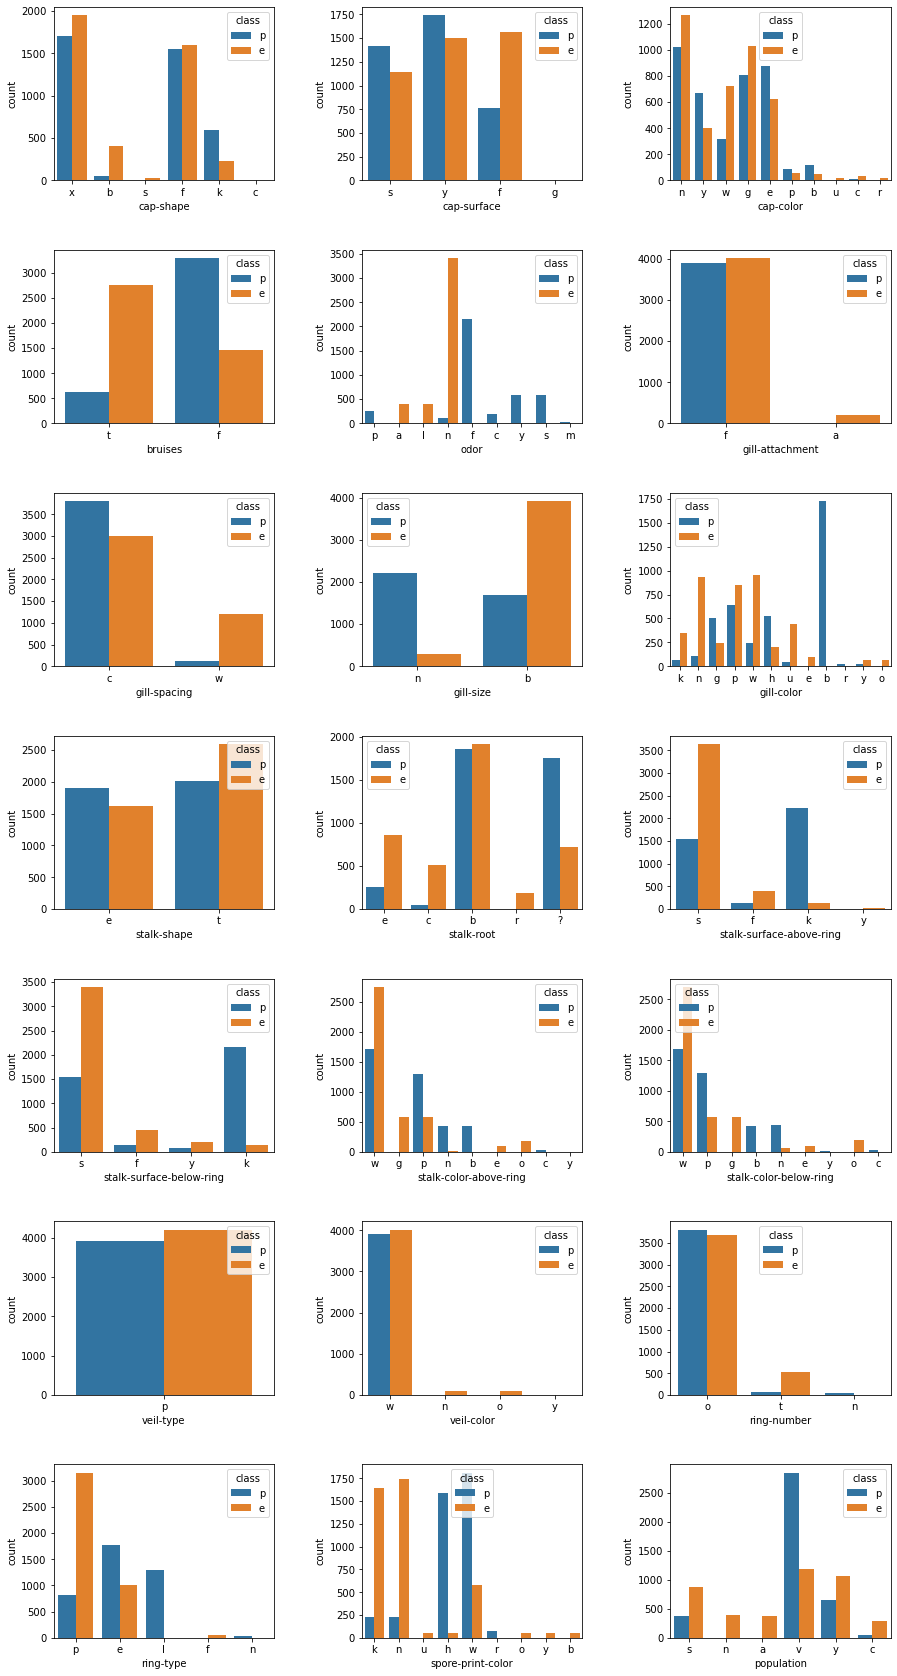

In [21]:
r,c = 7,3
fig,axes = plt.subplots(r,c,figsize=(15,30))

X = df.columns[1:]
ctr = 0

for i in range(r):
    for j in range(c):
        sns.countplot(ax=axes[i][j] ,x = df[X[ctr]],hue=df['class'])
        ctr += 1

plt.subplots_adjust(wspace=0.4, hspace=0.4) 

### Noting drastic count differences:
There is a considerable difference in the mushrooms with 'odor' having a 'n' tag and the 'gill-color' having a 'b' tag as being poisonous. <br>
This will be a good start for attributes to maintain or remove.

### Another code to look at distribution of each feature:

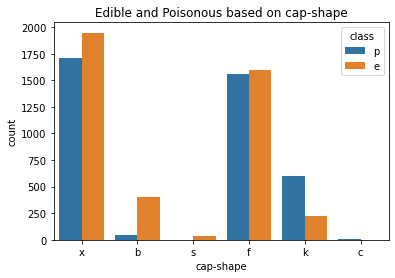

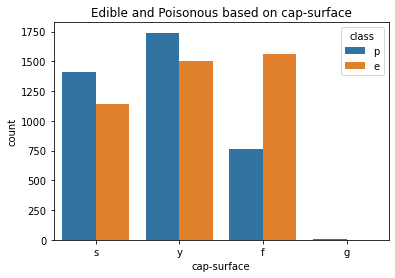

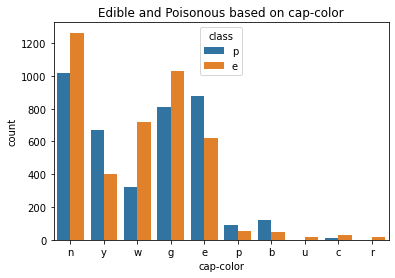

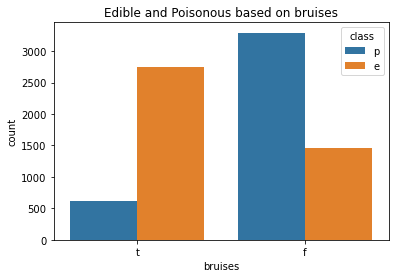

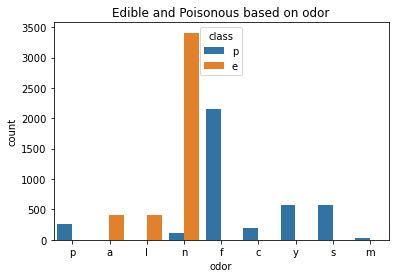

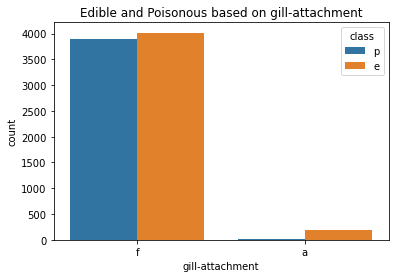

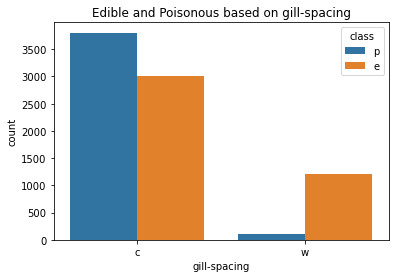

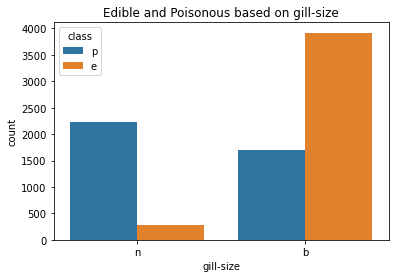

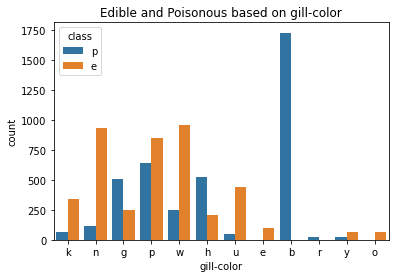

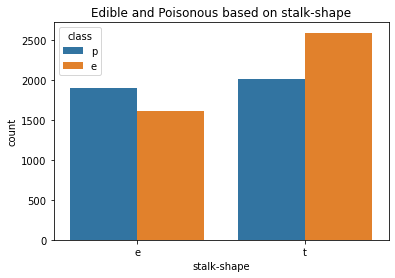

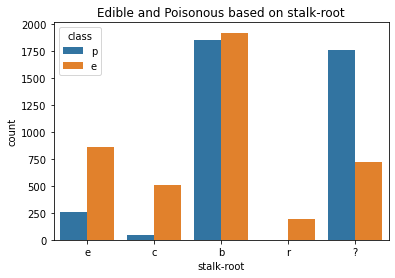

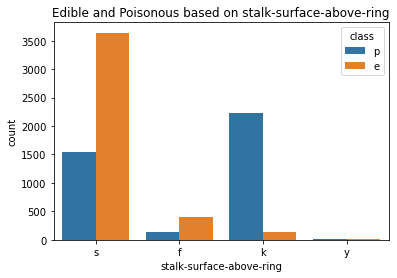

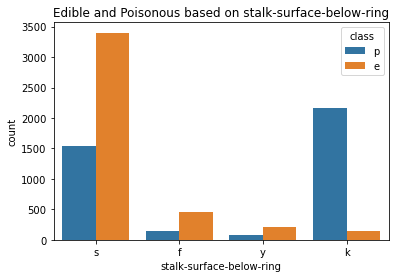

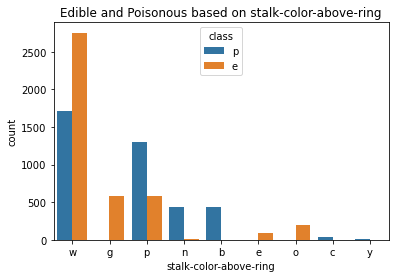

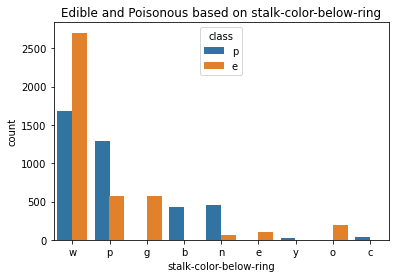

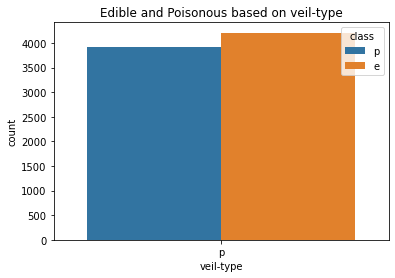

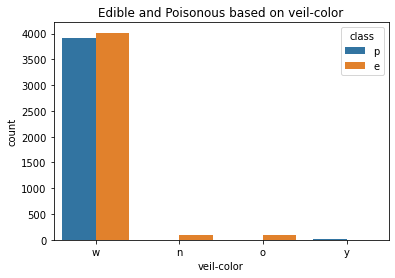

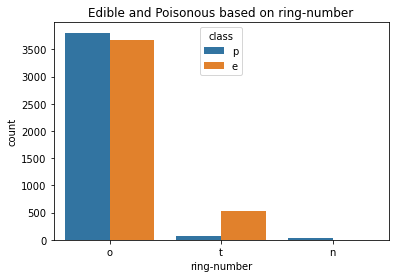

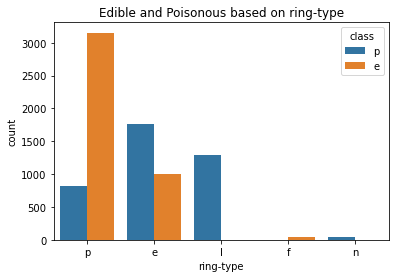

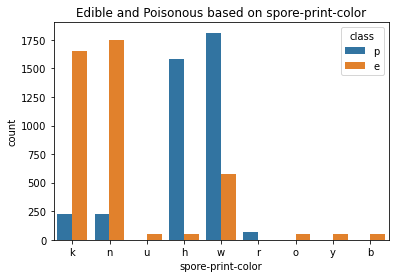

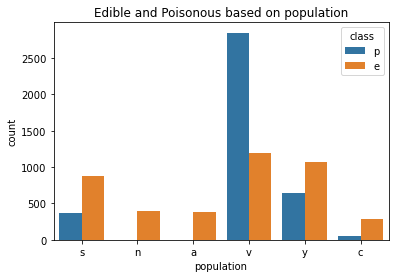

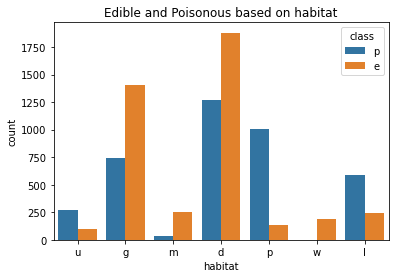

<Figure size 432x288 with 0 Axes>

In [23]:
for column in df.columns[1:]:
  sns.countplot(x=column, hue="class", data=df)
  plt.title('Edible and Poisonous based on ' + column)
  plt.show()
  plt.clf()

/Users/jameshoopes/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jameshoopes/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jameshoopes/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

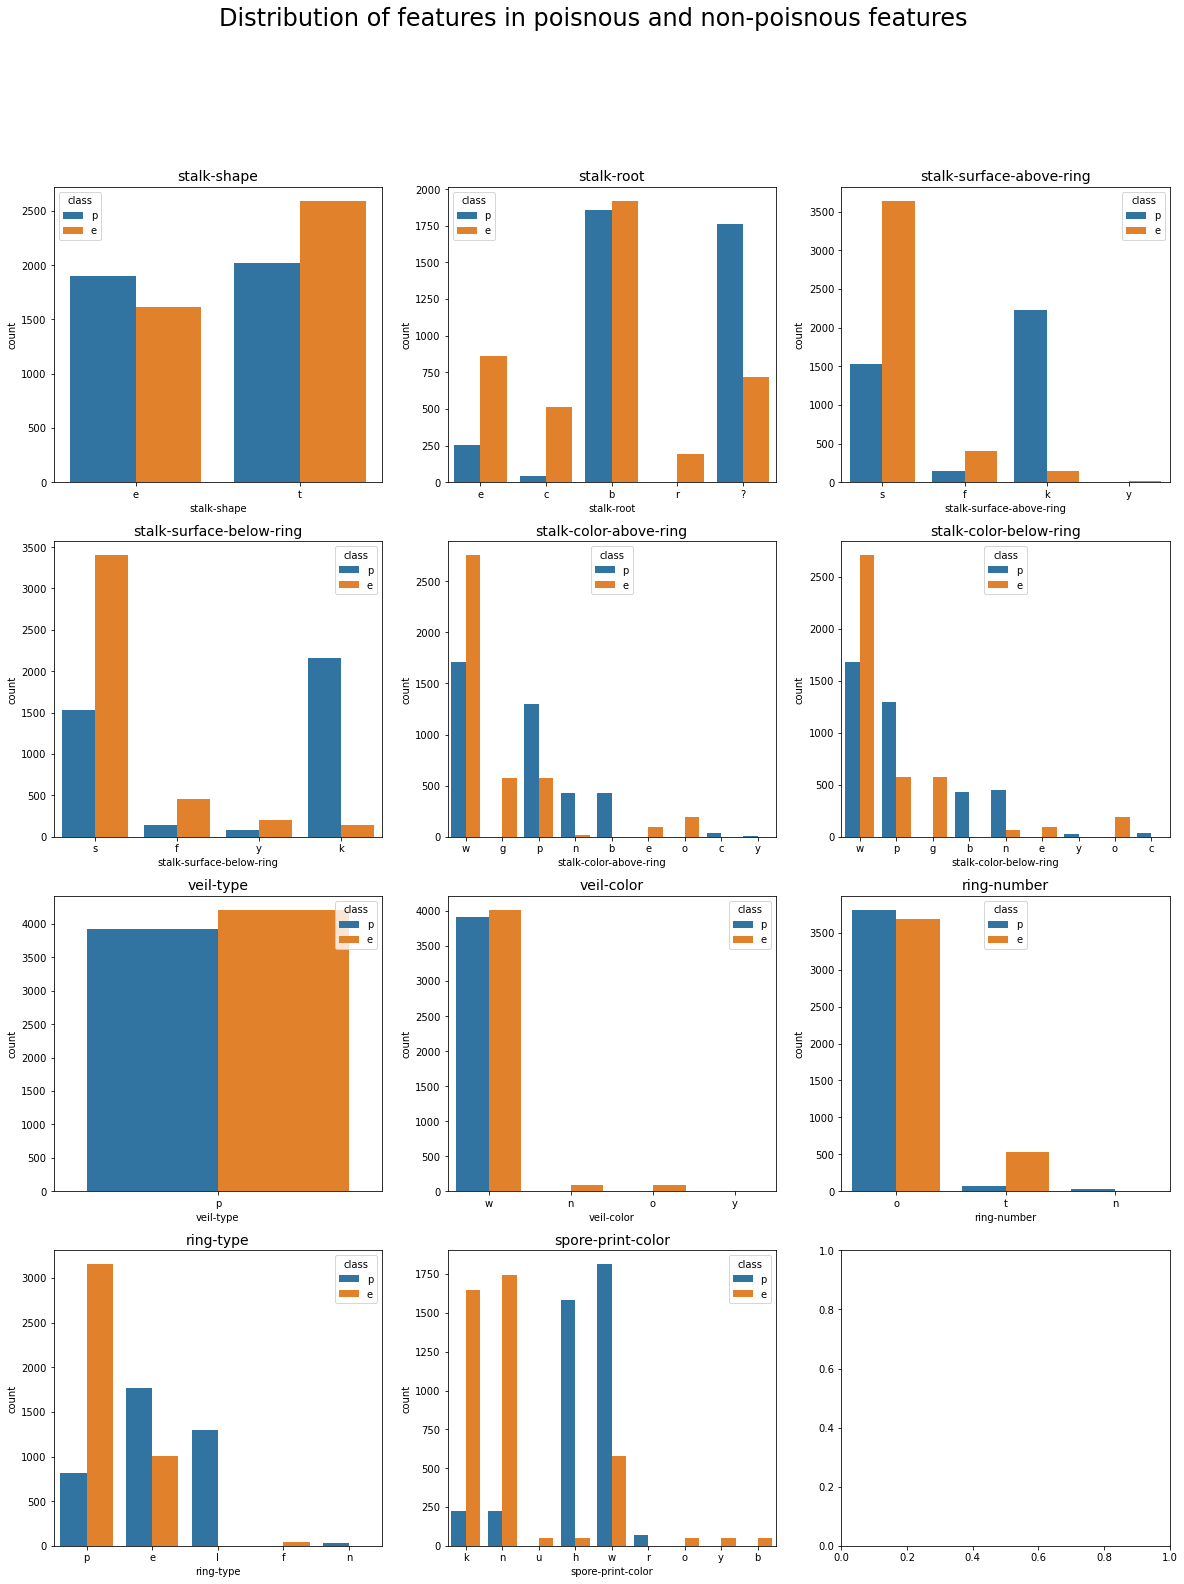

In [32]:
features=['stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color']
fig, ax=plt.subplots(4,3, figsize=(20,25))
for i in range(11):
    sns.countplot(features[i], hue='class',data=df, ax=ax[i//3][i%3])
    ax[i//3][i%3].set_title(features[i], fontsize=14)
plt.suptitle("Distribution of features in poisnous and non-poisnous features", fontsize=24)
plt.show()

/Users/jameshoopes/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jameshoopes/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jameshoopes/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

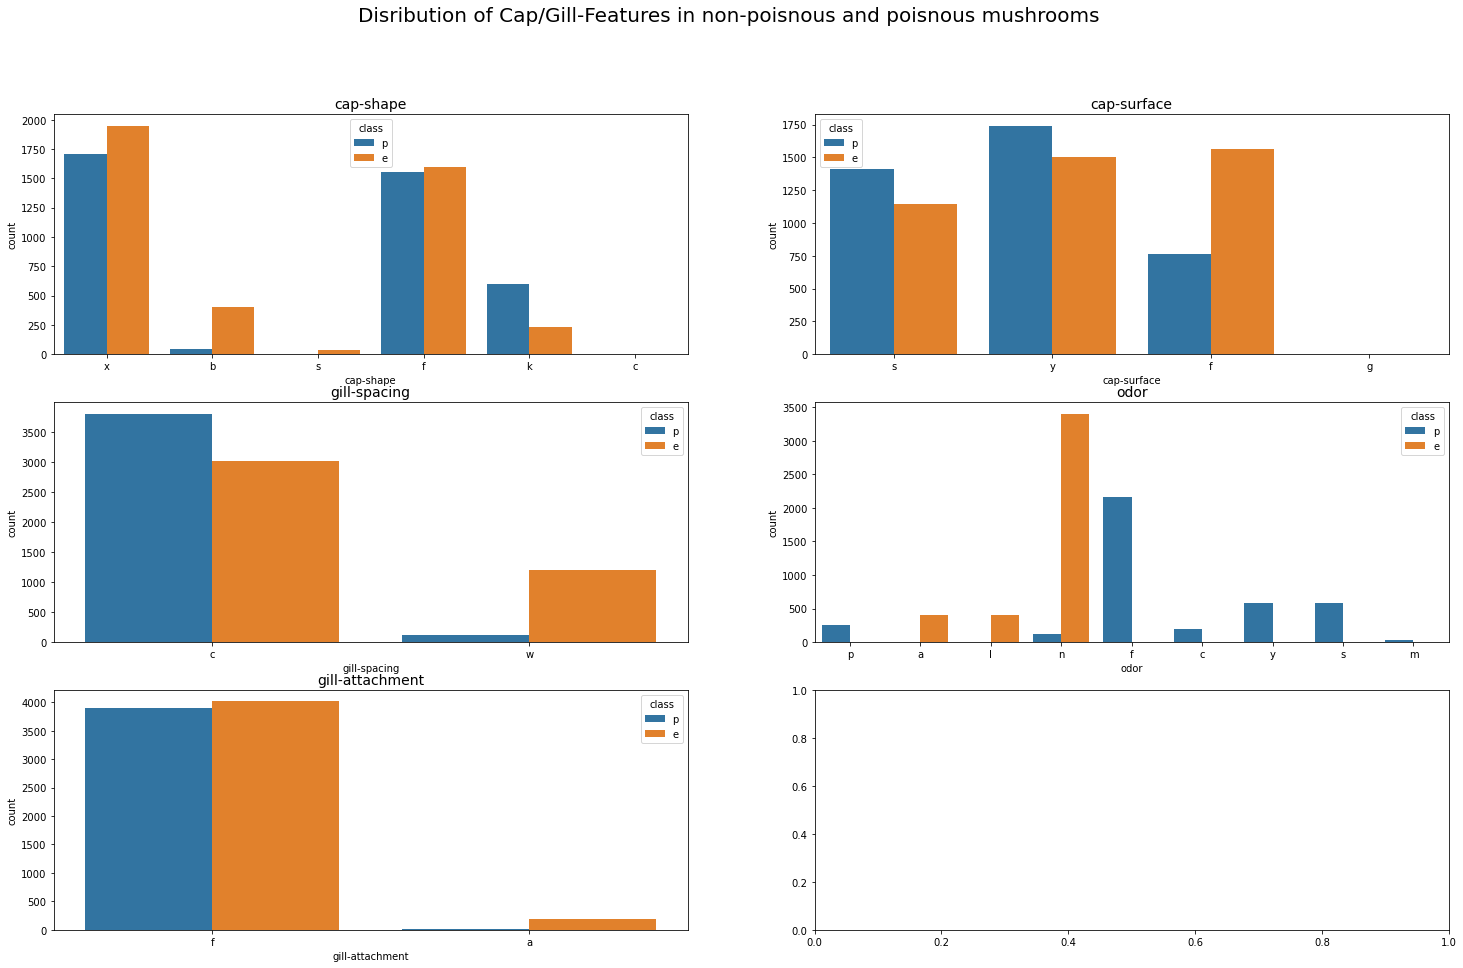

In [28]:
cat_feature=['cap-shape', 'cap-surface', 'gill-spacing', 'odor', 'gill-attachment', 'veil-type']
fig, ax=plt.subplots(3, 2, figsize=(25,15))
for i in range(5):
    sns.countplot(cat_feature[i], hue='class', data=df, ax=ax[i//2][i%2])
    ax[i//2][i%2].set_title(cat_feature[i], fontsize=14)
    
fig.suptitle("Disribution of Cap/Gill-Features in non-poisnous and poisnous mushrooms", fontsize=20)
plt.show()

/Users/jameshoopes/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jameshoopes/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jameshoopes/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

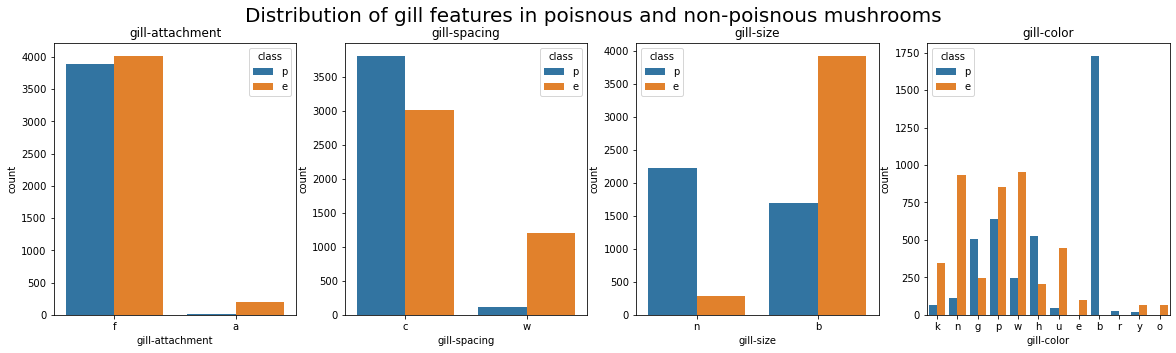

In [29]:
fig,ax=plt.subplots(1,4,figsize=(20,5))
sns.countplot('gill-attachment', hue='class', data=df, ax=ax[0])
ax[0].set_title('gill-attachment')

sns.countplot('gill-spacing', hue='class', data=df, ax=ax[1])
ax[1].set_title('gill-spacing')

sns.countplot('gill-size',hue='class', data=df, ax=ax[2])
ax[2].set_title('gill-size')

sns.countplot('gill-color',hue='class', data=df, ax=ax[3])
ax[3].set_title('gill-color')
fig.suptitle("Distribution of gill features in poisnous and non-poisnous mushrooms", fontsize=20)

plt.show()

/Users/jameshoopes/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jameshoopes/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


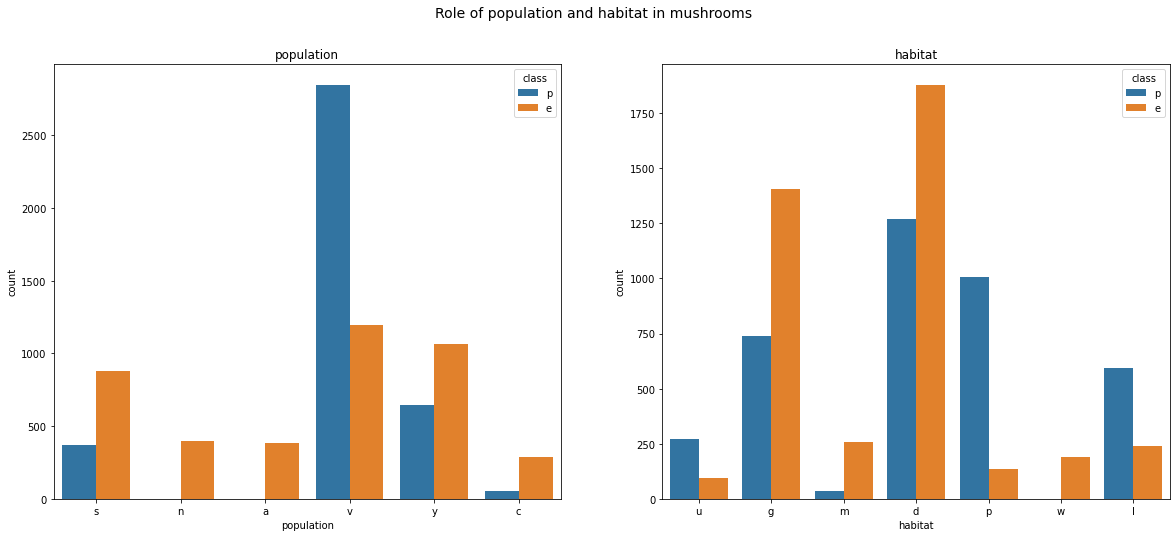

In [30]:
fig, ax=plt.subplots(1,2, figsize=(20,8))

sns.countplot('population', hue='class',data=df, ax=ax[0])
ax[0].set_title('population')

sns.countplot('habitat', hue='class', data=df, ax=ax[1])
ax[1].set_title('habitat')

plt.suptitle("Role of population and habitat in mushrooms", fontsize=14)
plt.show()

In [38]:
# Applying label encoder to transform labels into numeric form so as to convert it into the machine-readable form
from sklearn.preprocessing import LabelEncoder
df1=df.apply(LabelEncoder().fit_transform)

In [39]:
# Correlation function will calcuate the correlation of each feature with each other feature.
df1.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


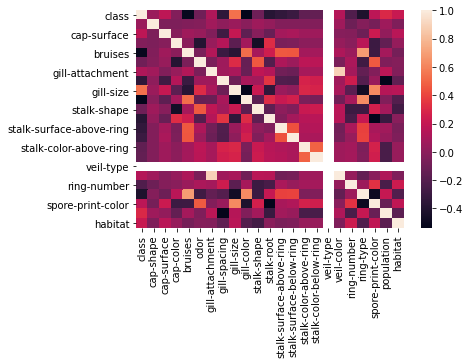

In [41]:
# Plotting heat map to visualize the correlation of each feature.
sns.heatmap(df1.corr())
plt.show()

# What are the top features for classification:

In [ ]:
chi square test